#TMRE MitoTracker green analysis (per surface)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from PIL import Image, ImageOps, ImageEnhance, ImageFilter
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import seaborn as sns

In [ ]:
#Chose colour map in https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html

#Functions
def MitoSignalModeling(image, enhanced):
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
    image1 = cv2.erode(image, kernel1)
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
    image2 = cv2.dilate(image1, kernel2)
    if 'Green' in enhanced:
        for row in range(image2.shape[0]):
            for col in range(image2.shape[1]):
              if 255 >= image2[row,col][1] > 50:
                image2[row,col][1] = 200
              else:
                image2[row,col][1] = 0

    return image2

def SignalModeling(image, enhanced):
    kernel1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
    image1 = cv2.erode(image, kernel1)
    kernel2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2,2))
    image2 = cv2.dilate(image1, kernel2)
    if 'Green' in enhanced:
        for row in range(image2.shape[0]):
            for col in range(image2.shape[1]):
              if image2[row,col][1] < 35:
                image2[row,col][1] = 0

    return image2

def TMRESurfaceAnalyzer(imag1, imag2, thres, Area, rowcut1, colcut1):
    if 'specific' in Area:
        image1 = imag1[rowcut1 : rowcut1+450, colcut1 : colcut1+450]
        image2 = imag2[rowcut1 : rowcut1+450, colcut1 : colcut1+450]
        imagegray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

    if 'All' in Area:
        image1 = imag1
        image2 = imag2
        imagegray2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

    plt.figure(figsize = (8,8))
    plot1 = plt.imshow(image1)

    plt.figure(figsize = (8,8))
    plot2 = plt.imshow(image2)

    #Establish the threshold for mitochondrias
    Image = image2
    Threshold, bi_image = cv2.threshold(imagegray2, thres, 255, cv2.THRESH_BINARY)
    plt.figure(figsize = (8,8))
    plot3 = plt.imshow(bi_image, cmap = 'gray')

    #finding countors
    imagecanny, contours = cv2.findContours(image = bi_image, mode = cv2.RETR_EXTERNAL, method = cv2.CHAIN_APPROX_NONE)

    #Draw and count identified cells
    l1, l2, l3, l4, l5 = [],[],[],[],[]
    Small_mitochondria = 0
    Small_intermedia_mitochondria = 0
    Intermedia_mitochondria = 0
    Large_intermedia_mitochondria = 0
    Large_mitochondria = 0
    for cnt in imagecanny:
        #print(len(cnt))
        if 25 >= len(cnt) > 1:
            Small_mitochondria = Small_mitochondria + 1
            l1.append(cnt)
        if 55 >= len(cnt) > 25:
            Small_intermedia_mitochondria = Small_intermedia_mitochondria + 1
            l2.append(cnt)
        if 85 >= len(cnt) > 55:
            Intermedia_mitochondria = Intermedia_mitochondria + 1
            l3.append(cnt)
        if 115 >= len(cnt) > 85:
            Large_intermedia_mitochondria = Large_intermedia_mitochondria + 1
            l4.append(cnt)
        if  len(cnt) > 115:
            Large_mitochondria = Large_mitochondria + 1
            l5.append(cnt)

    #draw the countors found
    cv2.drawContours(image = Image, contours = l1, contourIdx = -1, color = (60,20,220), thickness = 1)
    cv2.drawContours(image = Image, contours = l2, contourIdx = -1, color = (250,101,240), thickness = 1)
    cv2.drawContours(image = Image, contours = l3, contourIdx = -1, color = (252,106,135), thickness = 1)
    cv2.drawContours(image = Image, contours = l4, contourIdx = -1, color = (252,156,106), thickness = 1)
    cv2.drawContours(image = Image, contours = l5, contourIdx = -1, color = (241,252,128), thickness = 1)

    MitoTotal = (Small_mitochondria + Small_intermedia_mitochondria + Intermedia_mitochondria + Large_intermedia_mitochondria + Large_mitochondria)

    plt.figure(figsize = (8,8))
    plot4 = plt.imshow(Image)

    TMRE_smallmitochondria_signal = 0
    TMRE_smallmitochondria_pixels = 0

    TMRE_smallintermediamitochondria_signal = 0
    TMRE_smallintermediamitochondria_pixels = 0

    TMRE_intermediamitochondria_signal = 0
    TMRE_intermediamitochondria_pixels = 0

    TMRE_largeintermediamitochondria_signal = 0
    TMRE_largeintermediamitochondria_pixels = 0

    TMRE_largemitochondria_signal = 0
    TMRE_largemitochondria_pixels = 0


    for row in range(Image.shape[0]):
      for col in range(Image.shape[1]):
        if Image[row,col][0] == 60 and Image[row,col][1] == 20 and Image[row,col][2] == 220:
          TMRE_smallmitochondria_signal = TMRE_smallmitochondria_signal + image1[row,col][0]
          TMRE_smallmitochondria_pixels = TMRE_smallmitochondria_pixels + 1

        if Image[row,col][0] == 250 and Image[row,col][1] == 101 and Image[row,col][2] == 240:
          TMRE_smallintermediamitochondria_signal = TMRE_smallintermediamitochondria_signal + image1[row,col][0]
          TMRE_smallintermediamitochondria_pixels = TMRE_smallintermediamitochondria_pixels + 1

        if Image[row,col][0] == 252 and Image[row,col][1] == 106 and Image[row,col][2] == 135:
          TMRE_intermediamitochondria_signal = TMRE_intermediamitochondria_signal + image1[row,col][0]
          TMRE_intermediamitochondria_pixels = TMRE_intermediamitochondria_pixels + 1

        if Image[row,col][0] == 252 and Image[row,col][1] == 156 and Image[row,col][2] == 106:
          TMRE_largeintermediamitochondria_signal = TMRE_largeintermediamitochondria_signal + image1[row,col][0]
          TMRE_largeintermediamitochondria_pixels = TMRE_largeintermediamitochondria_pixels + 1

        if Image[row,col][0] == 241 and Image[row,col][1] == 252 and Image[row,col][2] == 128:
          TMRE_largemitochondria_signal = TMRE_largemitochondria_signal + image1[row,col][0]
          TMRE_largemitochondria_pixels = TMRE_largemitochondria_pixels + 1

    try:
      Small_TMRE = TMRE_smallmitochondria_signal / TMRE_smallmitochondria_pixels
      Small_TMRE_rel = Small_TMRE/(Small_mitochondria/MitoTotal*100)
    except:
      Small_TMRE = 0.00
      Small_TMRE_rel = 0.00
    try:
      Small_inter_TMRE = TMRE_smallintermediamitochondria_signal / TMRE_smallintermediamitochondria_pixels
      Small_inter_TMRE_rel = Small_inter_TMRE/(Small_intermedia_mitochondria/MitoTotal*100)
    except:
      Small_inter_TMRE = 0.00
      Small_inter_TMRE_rel = 0.00
    try:
      Intermedia_TMRE = TMRE_intermediamitochondria_signal / TMRE_intermediamitochondria_pixels
      Intermedia_TMRE_rel = Intermedia_TMRE/(Intermedia_mitochondria/MitoTotal*100)
    except:
      Intermedia_TMRE = 0.00
      Intermedia_TMRE_rel = 0.00
    try:
      Intermedialarge_TMRE = TMRE_largeintermediamitochondria_signal / TMRE_largeintermediamitochondria_pixels
      Intermedialarge_TMRE_rel = Intermedialarge_TMRE/(Large_intermedia_mitochondria/MitoTotal*100)
    except:
      Intermedialarge_TMRE = 0.00
      Intermedialarge_TMRE_rel = 0.00
    try:
      Large_TMRE = TMRE_largemitochondria_signal / TMRE_largemitochondria_pixels
      Large_TMRE_rel = Large_TMRE/(Large_mitochondria/MitoTotal*100)
    except:
      Large_TMRE = 0.00
      Large_TMRE_rel = 0.00

    Total_Signal = Small_TMRE + Small_inter_TMRE + Intermedia_TMRE + Intermedialarge_TMRE + Large_TMRE

    da = {'groups': ['Small', 'Small intermedia', 'Intermedia', 'Intermedia large', 'Large', 'Total mitochondria'],'Mitosurface' : [round(Small_mitochondria/MitoTotal*100,2), round(Small_intermedia_mitochondria/MitoTotal*100,2), round(Intermedia_mitochondria/MitoTotal*100,2), round(Large_intermedia_mitochondria/MitoTotal*100,2), round(Large_mitochondria/MitoTotal*100,2), round(MitoTotal,2)], 'TMRE signal' : [round(Small_TMRE,2) , round(Small_inter_TMRE,2), round(Intermedia_TMRE,2), round(Intermedialarge_TMRE,2), round(Large_TMRE,2), round(Total_Signal,2) ], 'TMRE signal relative' : [round(Small_TMRE_rel,2) , round(Small_inter_TMRE_rel,2), round(Intermedia_TMRE_rel,2), round(Intermedialarge_TMRE_rel,2), round(Large_TMRE_rel,2), '...' ]}
    dataframe = pd.DataFrame(data = da)

    return dataframe


# Working section

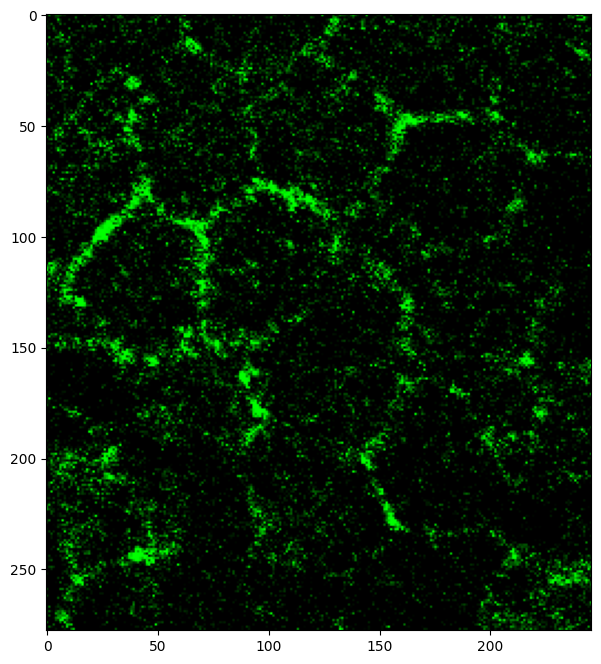

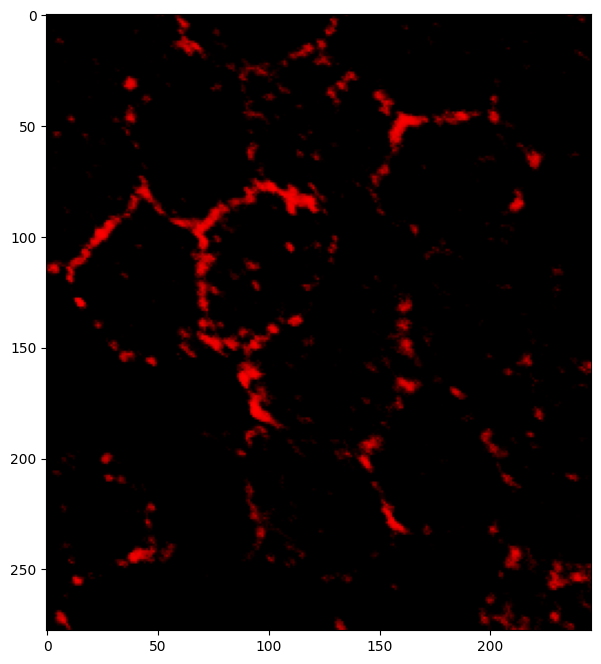

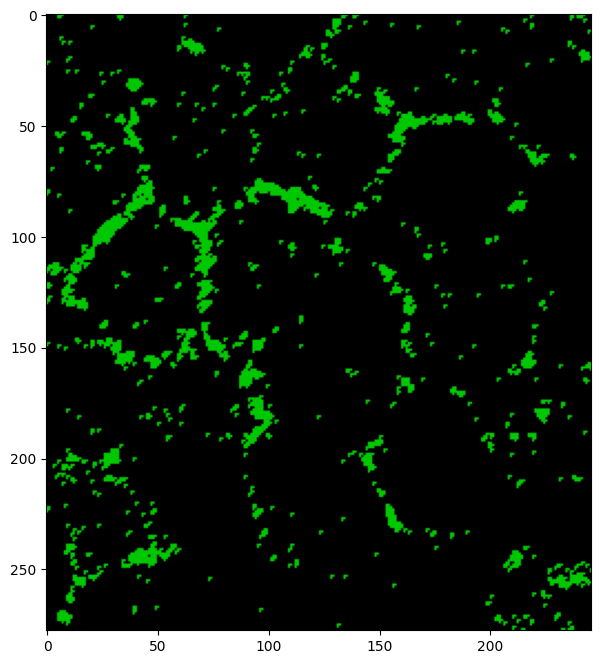

,groups,Mitosurface,TMRE signal,TMRE signal relative
0,Small,93.73,45.80,0.49
1,Small intermedia,3.81,97.37,25.53
2,Intermedia,1.63,101.80,62.27
3,Intermedia large,0.27,151.18,554.82
4,Large,0.54,116.39,213.58
5,Total mitochondria,367.00,512.54,...


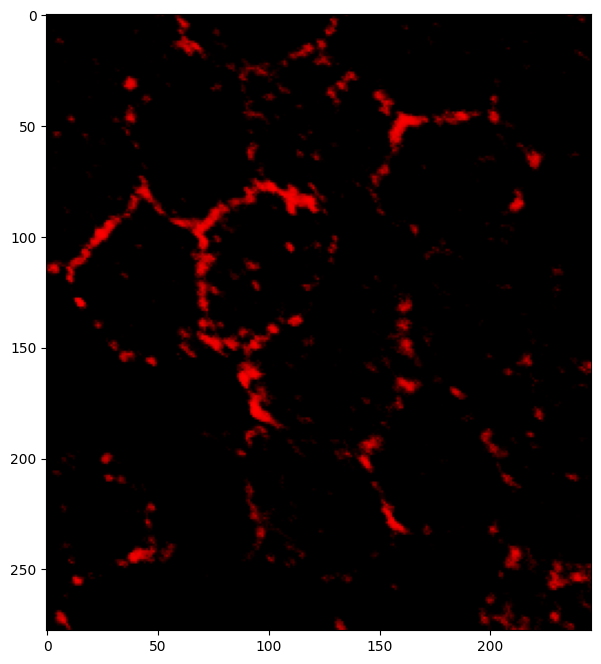

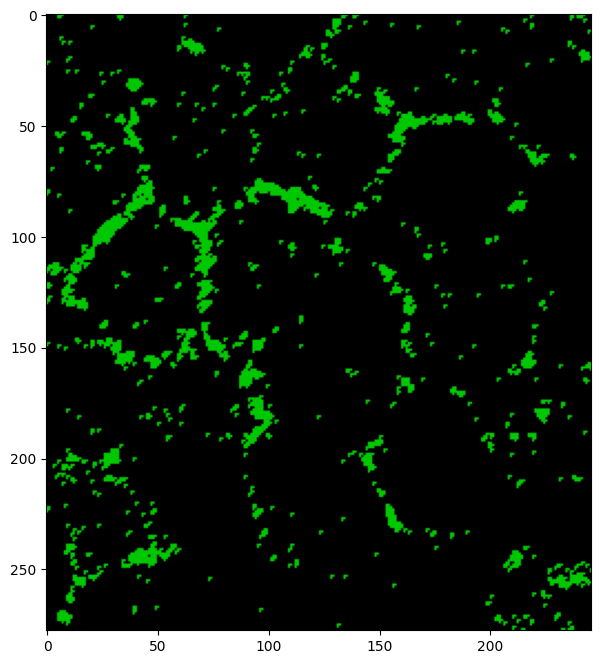

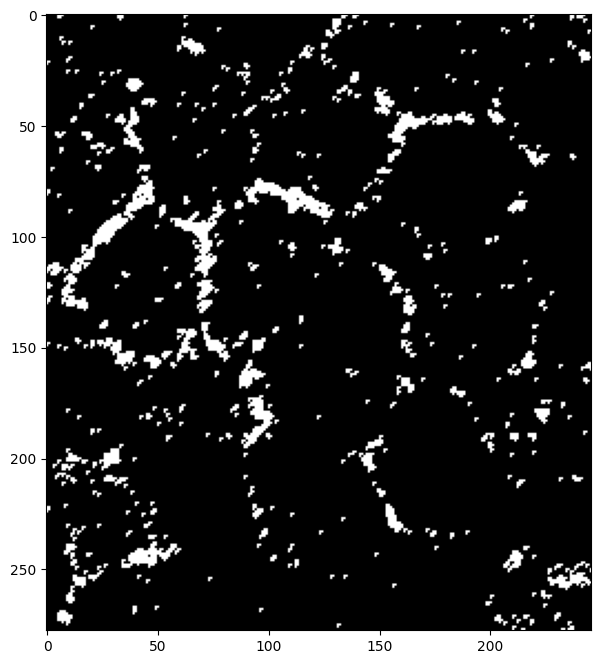

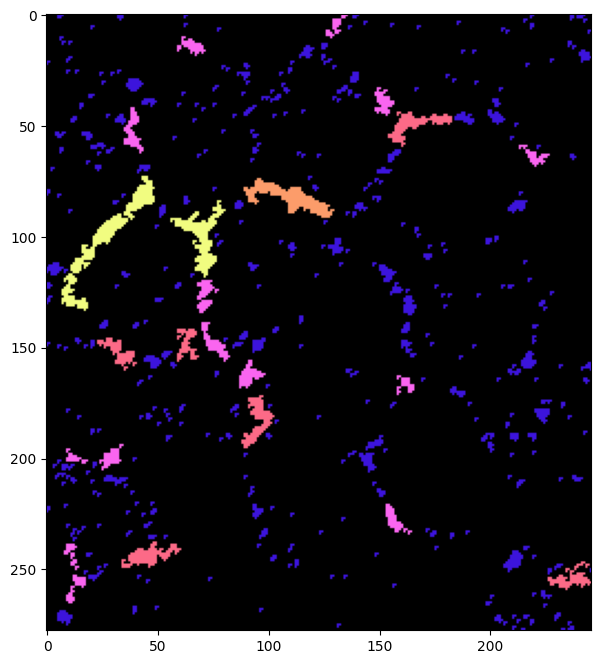

In [ ]:
# OD 3 TEMPORAL #

#Open and read image (MitoTracker)
path = r"/content/drive/MyDrive/Python protocols/Imagenes/TMRE MT green analysis SCGx 4w/MitoTracker/modificadas/R3 OD T.tif"
image1 = cv2.imread(path)

#Open and read image (TMRE)
path = r"/content/drive/MyDrive/Python protocols/Imagenes/TMRE MT green analysis SCGx 4w/TMRE/modificadas/R3 OD T.tif"
image2 = cv2.imread(path)

#Show image in RGB
imageRGB1 = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)
imageRGB2 = cv2.cvtColor(image2, cv2.COLOR_BGR2RGB)

plt.figure(figsize = (8,8))
plt.imshow(imageRGB1)
plt.show()

plt.figure(figsize = (8,8))
plt.imshow(imageRGB2)
plt.show()

#'SIGNALMODELING'
imageRGB1fil = MitoSignalModeling(imageRGB1,'Green')

plt.figure(figsize = (8,8))
plt.imshow(imageRGB1fil)
plt.show()


#TMRE ANALYSIS
TMREdata = TMRESurfaceAnalyzer(imageRGB2, imageRGB1fil, 10, 'All', None, None)
TMREdata
